# **Neural Networks**
part 4: architecture choice

### **Changes**
- nothing special
- new functions for visualization

### **Imports**

In [2]:
import pandas as pd
from tabulate import tabulate

from network.mlp import MLP
from network.activations import Identity, Sigmoid, Tanh, ReLU, Softmax
from network.losses import LossCrossEntropy, LossMSE
from visualization.visualization import (
    plot_loss_over_time, 
    plot_predictions, 
    plot_heatmap_mse_final_loss, 
    plot_heatmap_mse_test_loss, 
    plot_heatmap_training_time,
    run_classification)

from visualization.analysis import compare_all_methods

In [4]:
multimodal_large_train = pd.read_csv("./data/regression/multimodal-large-training.csv")
multimodal_large_test = pd.read_csv("./data/regression/multimodal-large-test.csv")
steps_large_train = pd.read_csv("./data/regression/steps-large-training.csv")
steps_large_test = pd.read_csv("./data/regression/steps-large-test.csv")

In [5]:
rings3_regular_train = pd.read_csv("./data/classification/rings3-regular-training.csv")
rings3_regular_test = pd.read_csv("./data/classification/rings3-regular-test.csv")
rings5_regular_train = pd.read_csv("./data/classification/rings5-regular-training.csv")
rings5_regular_test = pd.read_csv("./data/classification/rings5-regular-test.csv")

### **Best model choice**

In order to choose best model, we will examine performance on Multimodal Large Dataset. The possible architectures include:
- number of hidden layers: 1, 2 or 3
- number of neurons in hidden layers: 2, 5, 10 or 20
- activations: Identity, Sigmoid, Tanh and ReLU

Parameters learning rate and optimization method were chosen so that acceptable results are achieved.

In [6]:
comparison = compare_all_methods(train=multimodal_large_train,
                    test=multimodal_large_test,
                    task="regr",
                    numbers_of_hidden_layers=[1, 2, 3],
                    numbers_of_neurons=[2, 5, 10, 20],
                    activations=[Identity(), Sigmoid(), Tanh(), ReLU()],
                    epochs=1000,
                    method="momentum",
                    learninig_rate=0.0001)

Finished training with 1 hidden layers, 2 neurons and Identity activation function.
Finished training with 1 hidden layers, 2 neurons and Sigmoid activation function.
Finished training with 1 hidden layers, 2 neurons and Tanh activation function.
Finished training with 1 hidden layers, 2 neurons and ReLU activation function.
Finished training with 1 hidden layers, 5 neurons and Identity activation function.
Finished training with 1 hidden layers, 5 neurons and Sigmoid activation function.
Finished training with 1 hidden layers, 5 neurons and Tanh activation function.
Finished training with 1 hidden layers, 5 neurons and ReLU activation function.
Finished training with 1 hidden layers, 10 neurons and Identity activation function.
Finished training with 1 hidden layers, 10 neurons and Sigmoid activation function.
Finished training with 1 hidden layers, 10 neurons and Tanh activation function.
Finished training with 1 hidden layers, 10 neurons and ReLU activation function.
Finished traini

/Users/gasparsekula/Uni/sem6/mio/network/layers.py:93: RuntimeWarning: overflow encountered in matmul
  self.output_no_activation = np.matmul(input, self.weights.T) + self.biases.T
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Finished training with 3 hidden layers, 20 neurons and Identity activation function.
Finished training with 3 hidden layers, 20 neurons and Sigmoid activation function.
Finished training with 3 hidden layers, 20 neurons and Tanh activation function.
Finished training with 3 hidden layers, 20 neurons and ReLU activation function.


#### **Results**

1. Loss over time in respect to activation

In [7]:
results_df = pd.DataFrame(comparison)

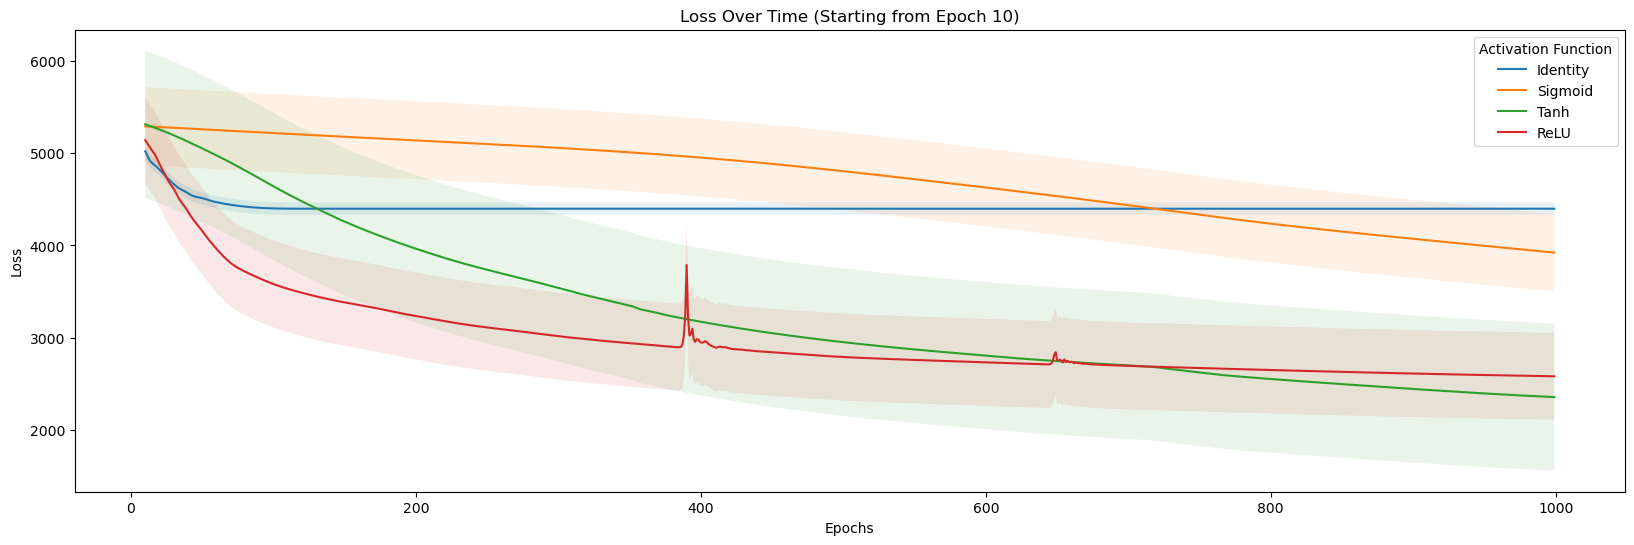

In [8]:
plot_loss_over_time(results_df)

2. final loss on train and test dataset

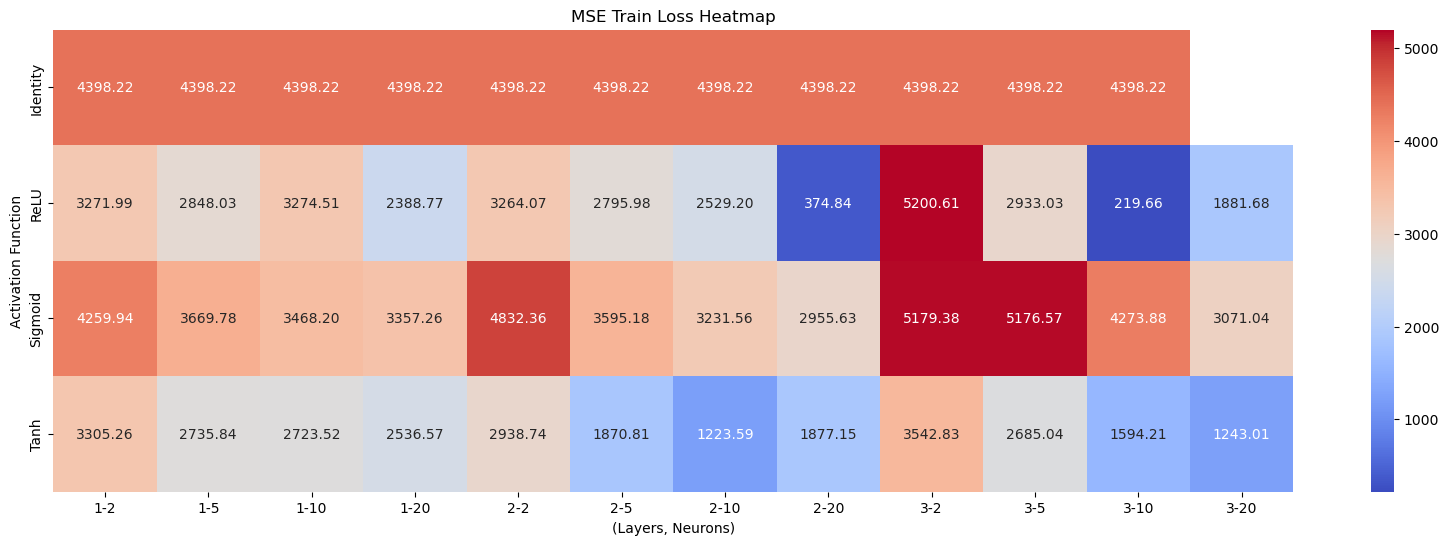

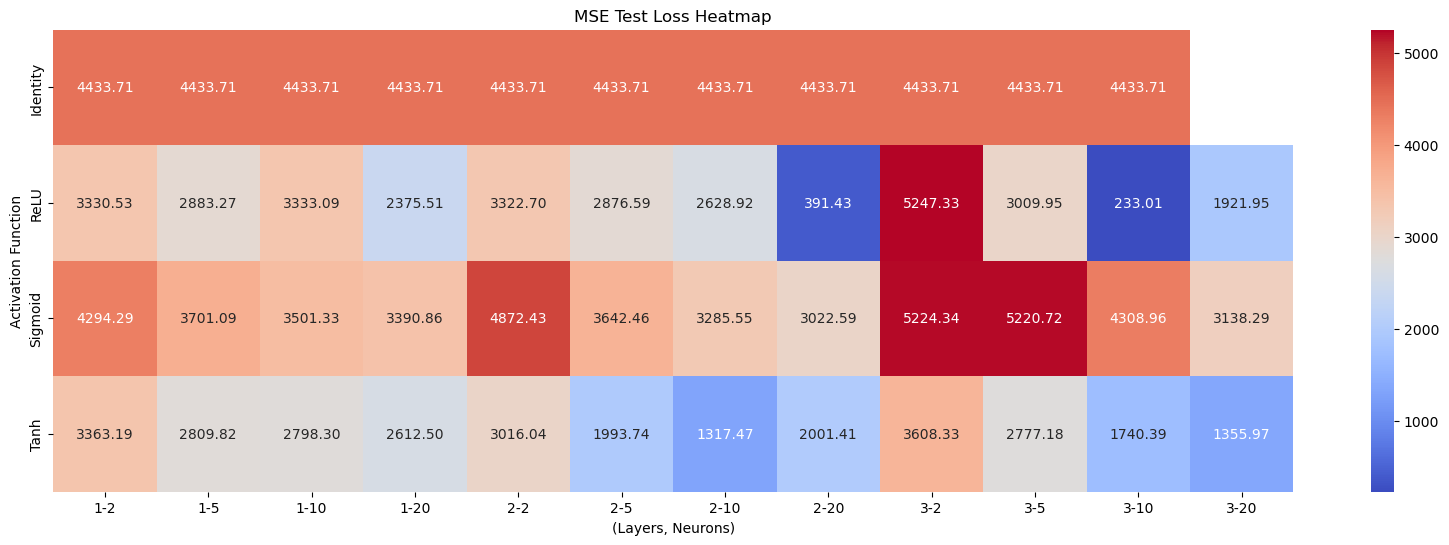

In [13]:
plot_heatmap_mse_final_loss(results_df)
plot_heatmap_mse_test_loss(results_df)

3. training time

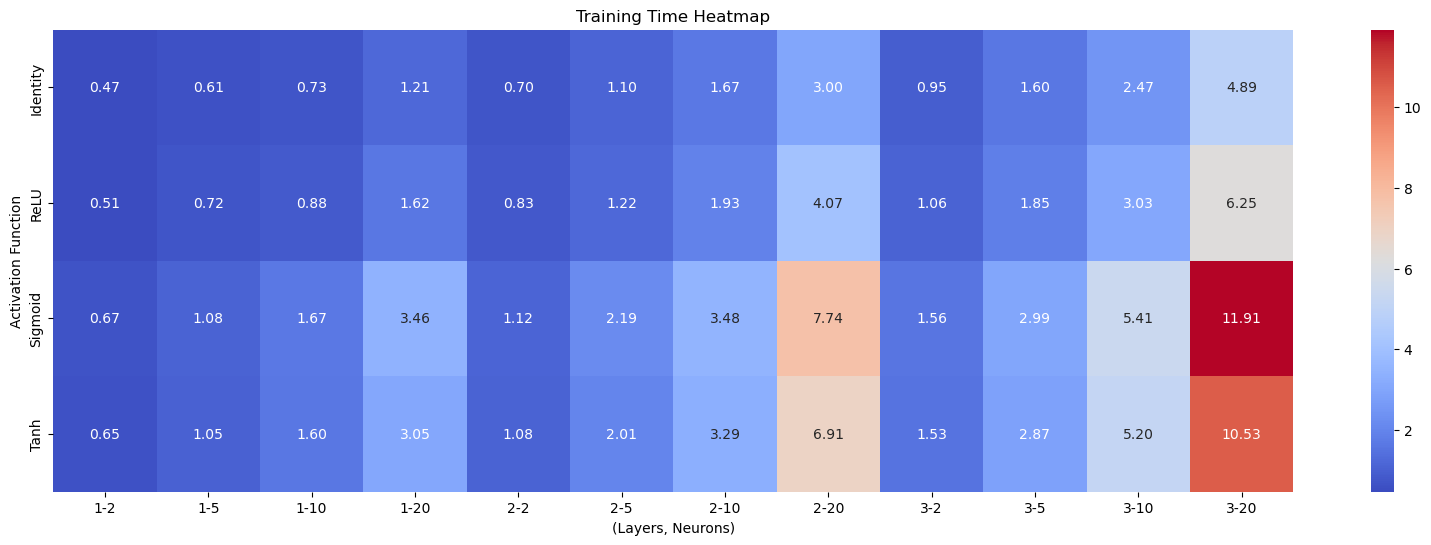

In [8]:
plot_heatmap_training_time(results_df)

4. predictions on test dataset

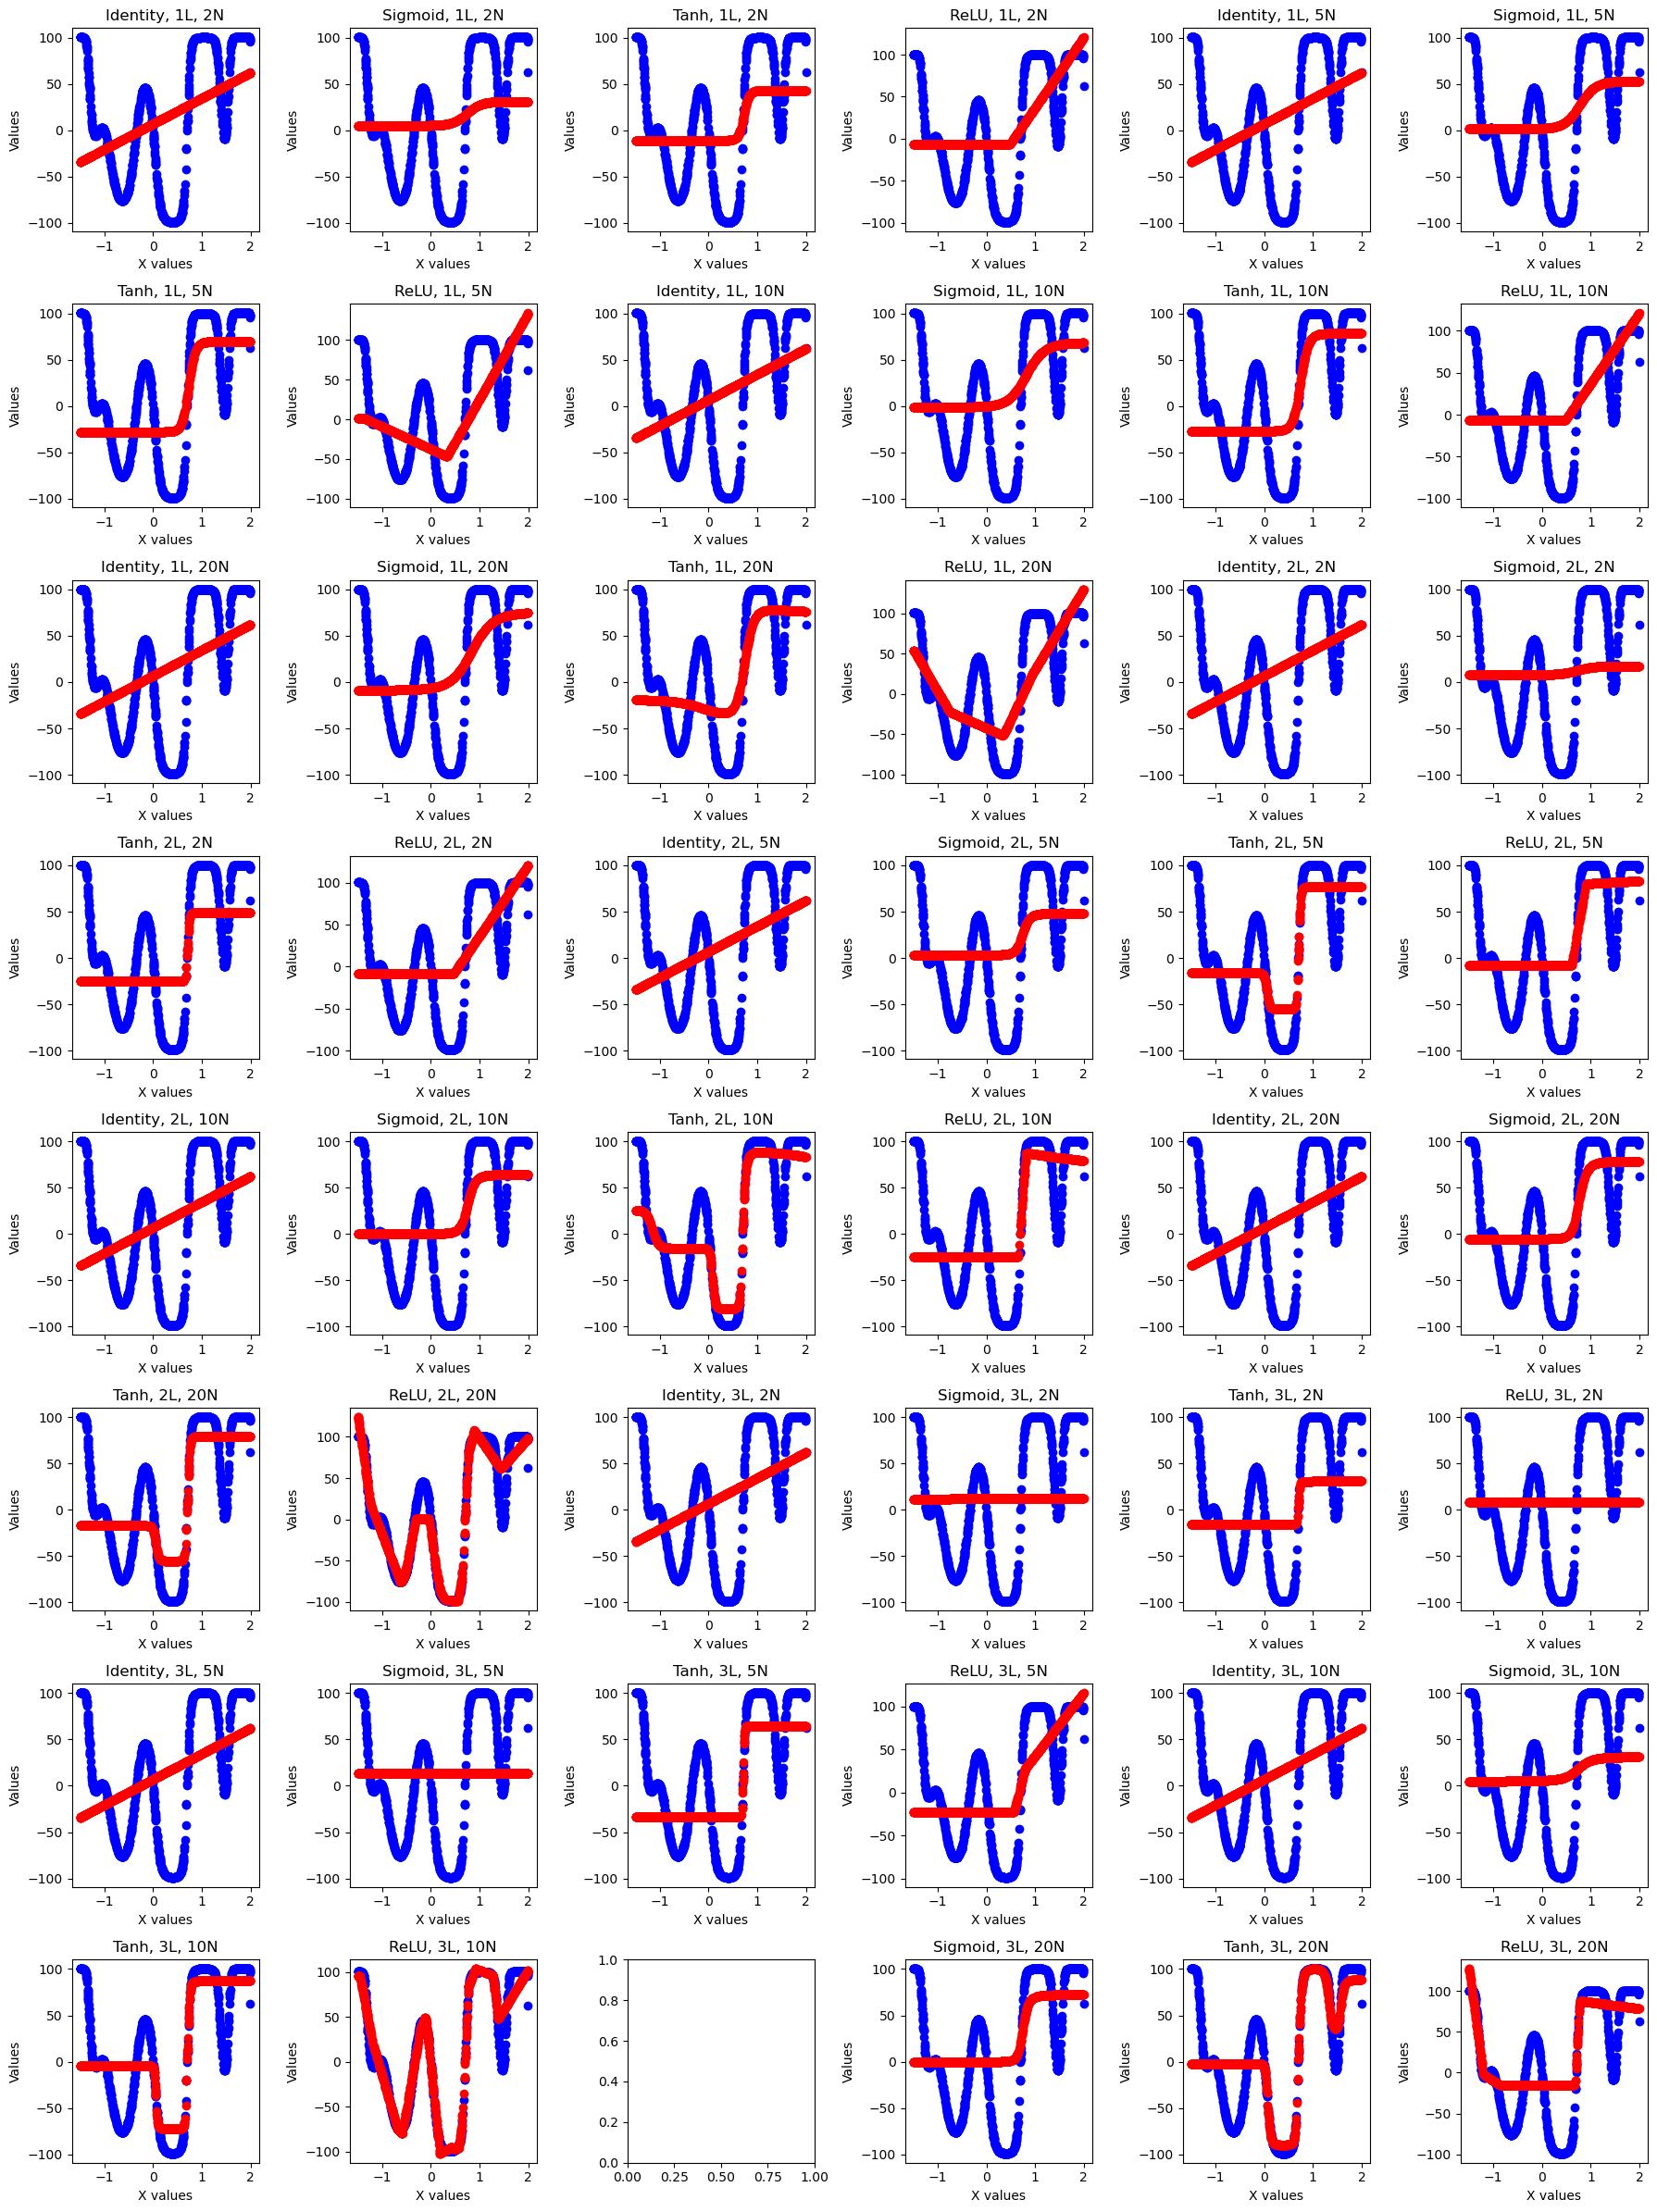

In [17]:
plot_predictions(results_df, multimodal_large_test["x"].values, multimodal_large_test["y"].values)

The best model can now be chosen:
- 3 hdden layers
- 10 neurons each
- ReLU activation

The training time is acceptable compared to other architectures.

Second best model is:
- 2 hdden layers
- 20 neurons each
- ReLU activation

The training time is also (but a little less) acceptable compared to other architectures.

---
### **Tests**
### **Task: regression**
### **Dataset: steps large**

Architecture 1. (10-10-10)

Epoch:	0	Loss (MSE):	7204.9636
Epoch:	1000	Loss (MSE):	265.1365
Epoch:	2000	Loss (MSE):	133.8198
Epoch:	3000	Loss (MSE):	151.6155
Epoch:	4000	Loss (MSE):	120.5437
Epoch:	5000	Loss (MSE):	121.3121
Epoch:	6000	Loss (MSE):	117.3059
Epoch:	7000	Loss (MSE):	121.2034
Epoch:	8000	Loss (MSE):	116.3009
Epoch:	9000	Loss (MSE):	116.9101
Final epoch:	9999	Loss (MSE):	138.9442


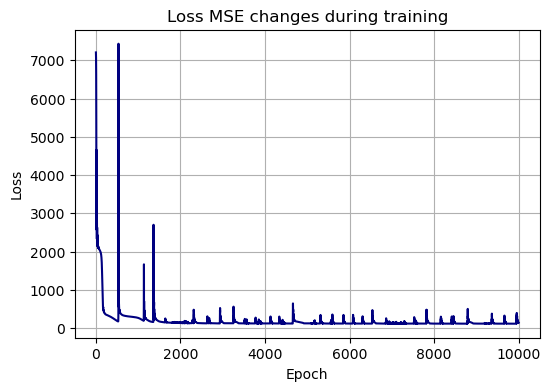

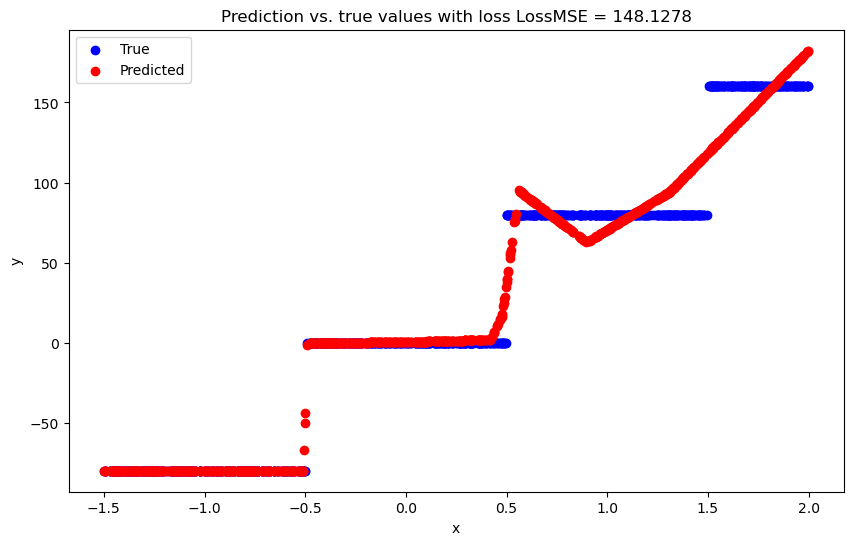

Loss LossMSE = 148.12780191471757.


In [36]:
mlp1 = MLP(input=steps_large_train[["x"]].to_numpy(),
           layers_init = [
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 1, "activation": Identity(), "init": "uniform"}],
           loss_function=LossMSE(),
           random_state=42)

mlp1.train(X_train=steps_large_train[["x"]].to_numpy(),
            Y_train=steps_large_train[["y"]].to_numpy(),
            epochs=10_000,
            learning_rate=0.00015,
            method="momentum",
            weights_decay=0.9,
            verbose=True)
mlp1.plot_training()
mlp1.visualize_prediction(steps_large_test[["x"]].to_numpy(), steps_large_test[["y"]].to_numpy())

Epoch:	0	Loss (MSE):	7307.7054
Epoch:	1000	Loss (MSE):	157.9853
Epoch:	2000	Loss (MSE):	114.5665
Epoch:	3000	Loss (MSE):	34.2651
Epoch:	4000	Loss (MSE):	28.0309
Epoch:	5000	Loss (MSE):	24.5023
Epoch:	6000	Loss (MSE):	40.3944
Epoch:	7000	Loss (MSE):	22.5692
Epoch:	8000	Loss (MSE):	17.9423
Epoch:	9000	Loss (MSE):	16.7432
Final epoch:	9999	Loss (MSE):	15.7945


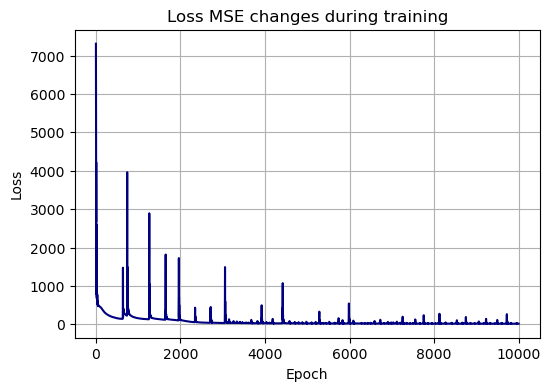

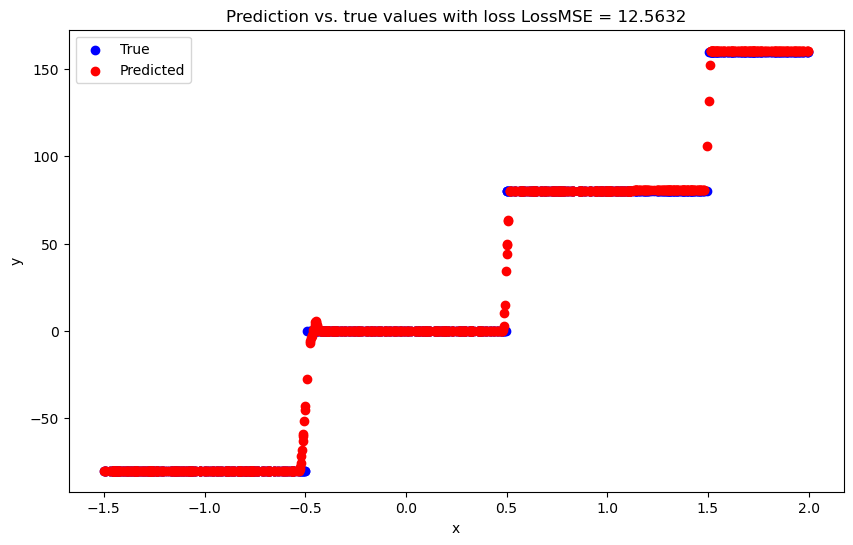

Loss LossMSE = 12.56318210073189.


In [43]:
mlp2 = MLP(input=steps_large_train[["x"]].to_numpy(),
           layers_init = [
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 1, "activation": Identity(), "init": "uniform"}],
           loss_function=LossMSE(),
           random_state=42)

mlp2.train(X_train=steps_large_train[["x"]].to_numpy(),
            Y_train=steps_large_train[["y"]].to_numpy(),
            epochs=10_000,
            learning_rate=0.0005,
            method="momentum",
            weights_decay=0.9,
            verbose=True)
mlp2.plot_training()
mlp2.visualize_prediction(steps_large_test[["x"]].to_numpy(), steps_large_test[["y"]].to_numpy())

Summary

In [44]:
th1 = mlp1.get_training_history()
th2 = mlp2.get_training_history()

regression_summary = [
    ["Architecture 1. (10-10-10)", len(th1["losses"]), th1["losses"][-1]],
    ["Archtecture 2. (20-20)", len(th2["losses"]), th2["losses"][-1]],
]

headers = ["Model", "Epochs", "Final Loss"]

print(tabulate(regression_summary, headers=headers, floatfmt=".4f", tablefmt="grid"))

+----------------------------+----------+--------------+
| Model                      |   Epochs |   Final Loss |
+============================+==========+==============+
| Architecture 1. (10-10-10) |    10000 |     138.9442 |
+----------------------------+----------+--------------+
| Archtecture 2. (20-20)     |    10000 |      15.7945 |
+----------------------------+----------+--------------+


### **Task: classification**
### **Dataset: Rings 3 regular**

Architecture 1. (10-10-10)

Dataset overview.


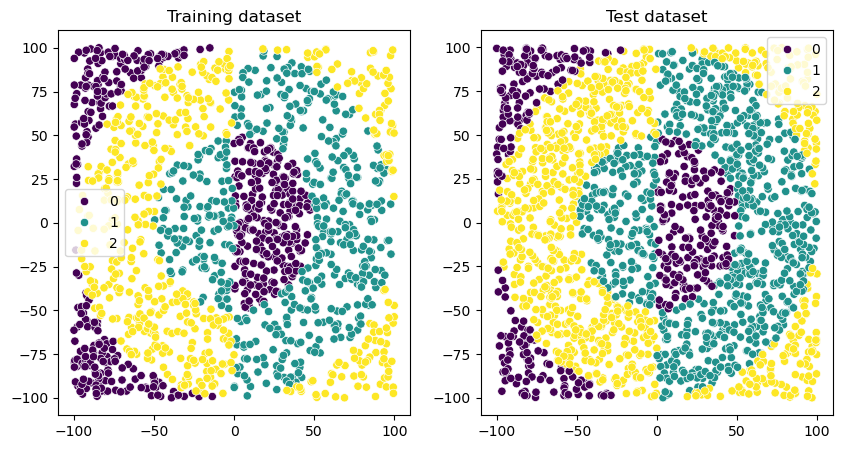

Training network.
Epoch:	0	Loss (Cross Entropy):		1.4972	F1 Score:	0.1808
Epoch:	100	Loss (Cross Entropy):		0.1860	F1 Score:	0.9239
Epoch:	200	Loss (Cross Entropy):		0.1219	F1 Score:	0.9533
Epoch:	300	Loss (Cross Entropy):		0.1605	F1 Score:	0.9386
Epoch:	400	Loss (Cross Entropy):		0.0704	F1 Score:	0.9756
Epoch:	500	Loss (Cross Entropy):		0.0497	F1 Score:	0.9857
Epoch:	600	Loss (Cross Entropy):		0.0392	F1 Score:	0.9880
Epoch:	700	Loss (Cross Entropy):		0.0323	F1 Score:	0.9887
Epoch:	800	Loss (Cross Entropy):		0.0268	F1 Score:	0.9947
Epoch:	900	Loss (Cross Entropy):		0.0228	F1 Score:	0.9967
Final epoch:	999	Loss (Cross Entropy):		0.0199	F1 Score:	0.9980
Training results.


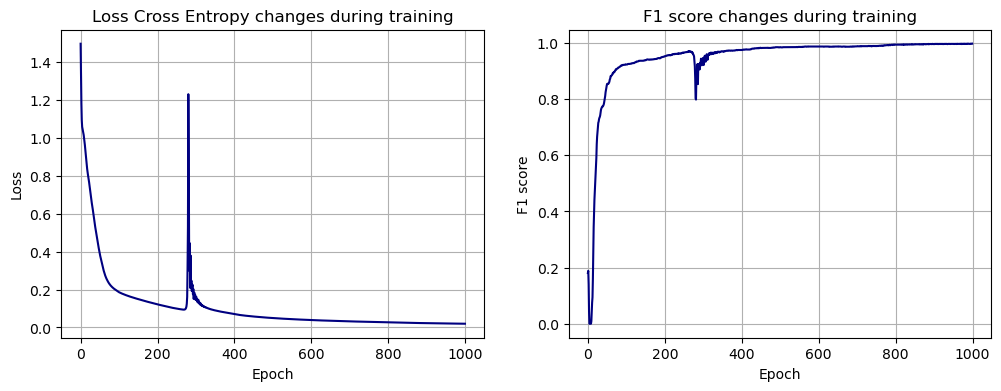

F-Measure on TEST dataset: 0.9691

Results.


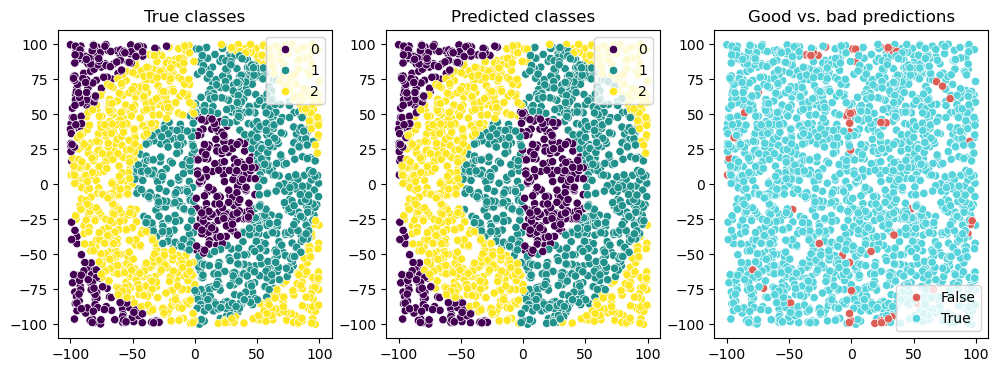

In [17]:
rings3_a1 = run_classification(train = rings3_regular_train,
                   test = rings3_regular_test,
                   layers_init=[
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 3, "activation": Softmax(), "init": "xavier_normal"}],
                   loss_function=LossCrossEntropy(),
                   epochs = 1000,
                   learning_rate = 0.05,
                   method = "momentum",
                   scaling = True,
                   random_state=42,
                   )

Architecture 2. (20-20)

Dataset overview.


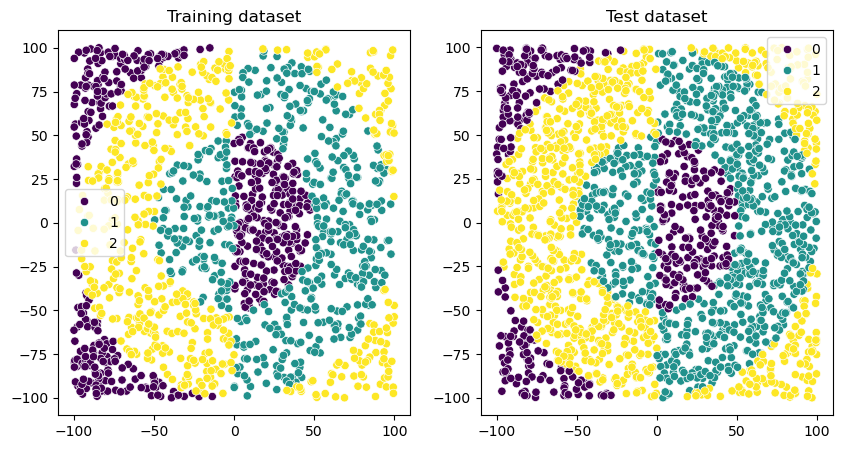

Training network.
Epoch:	0	Loss (Cross Entropy):		1.3927	F1 Score:	0.1121
Epoch:	100	Loss (Cross Entropy):		0.2390	F1 Score:	0.9244
Epoch:	200	Loss (Cross Entropy):		0.1610	F1 Score:	0.9467
Epoch:	300	Loss (Cross Entropy):		0.1266	F1 Score:	0.9626
Epoch:	400	Loss (Cross Entropy):		0.1053	F1 Score:	0.9693
Epoch:	500	Loss (Cross Entropy):		0.0891	F1 Score:	0.9773
Epoch:	600	Loss (Cross Entropy):		0.0774	F1 Score:	0.9847
Epoch:	700	Loss (Cross Entropy):		0.0677	F1 Score:	0.9853
Epoch:	800	Loss (Cross Entropy):		0.0598	F1 Score:	0.9873
Epoch:	900	Loss (Cross Entropy):		0.0536	F1 Score:	0.9873
Final epoch:	999	Loss (Cross Entropy):		0.0486	F1 Score:	0.9887
Training results.


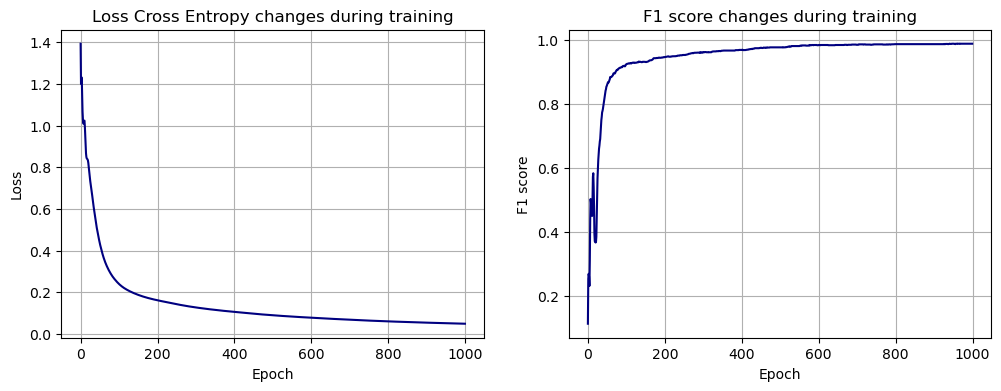

F-Measure on TEST dataset: 0.9637

Results.


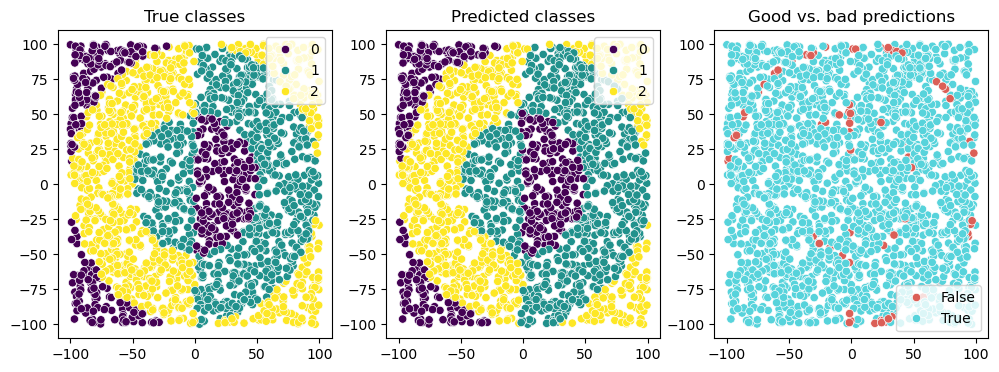

In [18]:
rings3_a2 = run_classification(train = rings3_regular_train,
                   test = rings3_regular_test,
                   layers_init=[
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 3, "activation": Softmax(), "init": "xavier_normal"}],
                   loss_function=LossCrossEntropy(),
                   epochs = 1000,
                   learning_rate = 0.05,
                   method = "momentum",
                   scaling = True,
                   random_state=42,
                   )

### **Dataset: Rings 5 regular**

Architecture 1. (10-10-10)

Dataset overview.


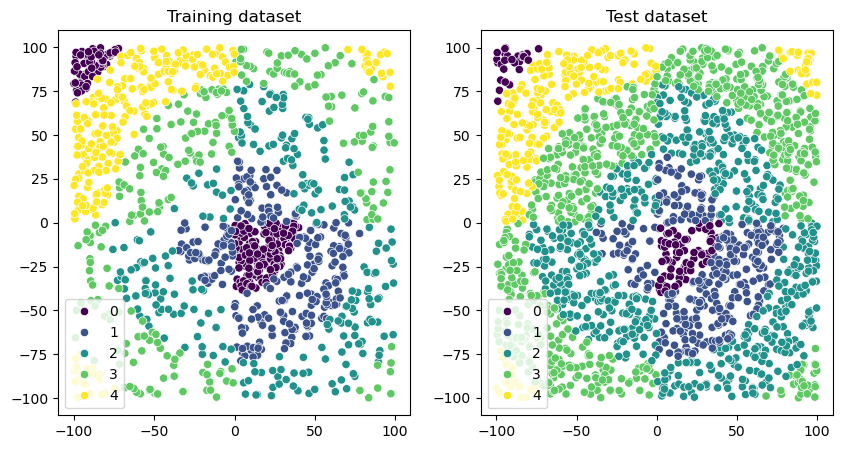

Training network.
Epoch:	0	Loss (Cross Entropy):		1.8264	F1 Score:	0.0000
Epoch:	100	Loss (Cross Entropy):		0.3269	F1 Score:	0.8749
Epoch:	200	Loss (Cross Entropy):		0.2226	F1 Score:	0.9174
Epoch:	300	Loss (Cross Entropy):		0.1833	F1 Score:	0.9319
Epoch:	400	Loss (Cross Entropy):		0.4186	F1 Score:	0.8375
Epoch:	500	Loss (Cross Entropy):		0.1540	F1 Score:	0.9439
Epoch:	600	Loss (Cross Entropy):		0.1273	F1 Score:	0.9536
Epoch:	700	Loss (Cross Entropy):		0.1057	F1 Score:	0.9648
Epoch:	800	Loss (Cross Entropy):		0.0928	F1 Score:	0.9728
Epoch:	900	Loss (Cross Entropy):		0.0842	F1 Score:	0.9736
Final epoch:	999	Loss (Cross Entropy):		0.0785	F1 Score:	0.9728
Training results.


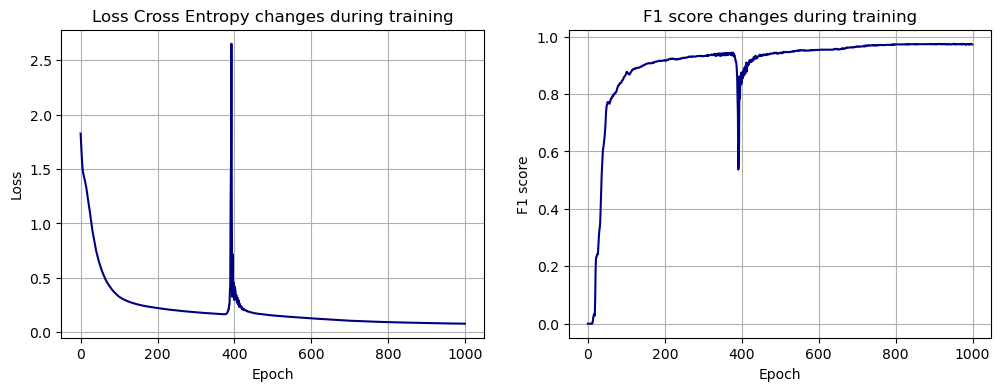

F-Measure on TEST dataset: 0.9310

Results.


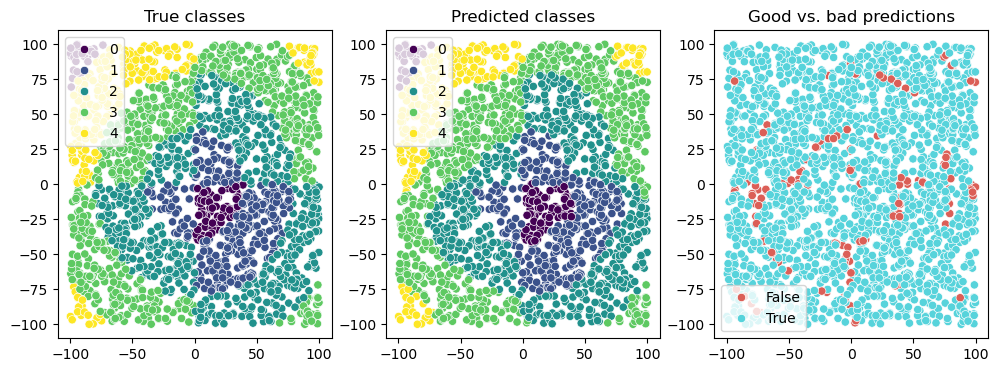

In [20]:
rings5_a1 = run_classification(train = rings5_regular_train,
                   test = rings5_regular_test,
                   layers_init=[
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 10, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 5, "activation": Softmax(), "init": "xavier_normal"}],
                   loss_function=LossCrossEntropy(),
                   epochs = 1000,
                   learning_rate = 0.05,
                   method = "momentum",
                   scaling = True,
                   random_state=42,
                   )

Architecture 2. (20-20)

Dataset overview.


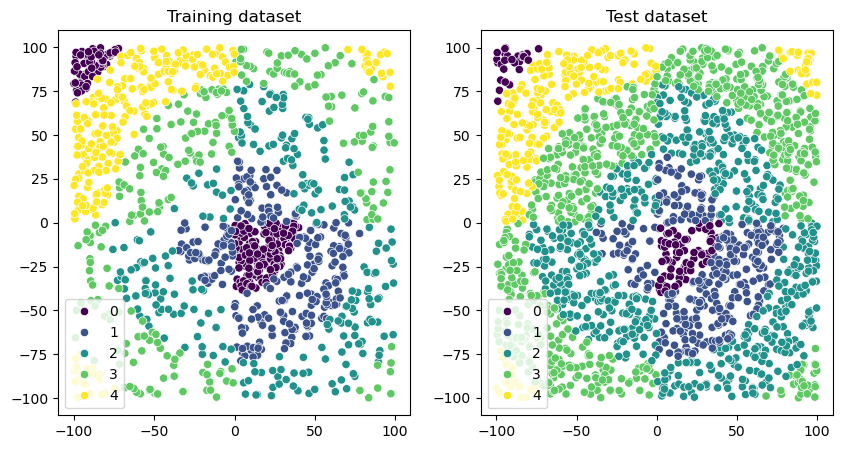

Training network.
Epoch:	0	Loss (Cross Entropy):		1.7666	F1 Score:	0.1056
Epoch:	100	Loss (Cross Entropy):		0.3638	F1 Score:	0.8751
Epoch:	200	Loss (Cross Entropy):		0.2546	F1 Score:	0.9077
Epoch:	300	Loss (Cross Entropy):		0.2161	F1 Score:	0.9200
Epoch:	400	Loss (Cross Entropy):		0.1930	F1 Score:	0.9316
Epoch:	500	Loss (Cross Entropy):		0.1732	F1 Score:	0.9381
Epoch:	600	Loss (Cross Entropy):		0.1545	F1 Score:	0.9445
Epoch:	700	Loss (Cross Entropy):		0.1386	F1 Score:	0.9550
Epoch:	800	Loss (Cross Entropy):		0.1244	F1 Score:	0.9575
Epoch:	900	Loss (Cross Entropy):		0.1115	F1 Score:	0.9623
Final epoch:	999	Loss (Cross Entropy):		0.1008	F1 Score:	0.9712
Training results.


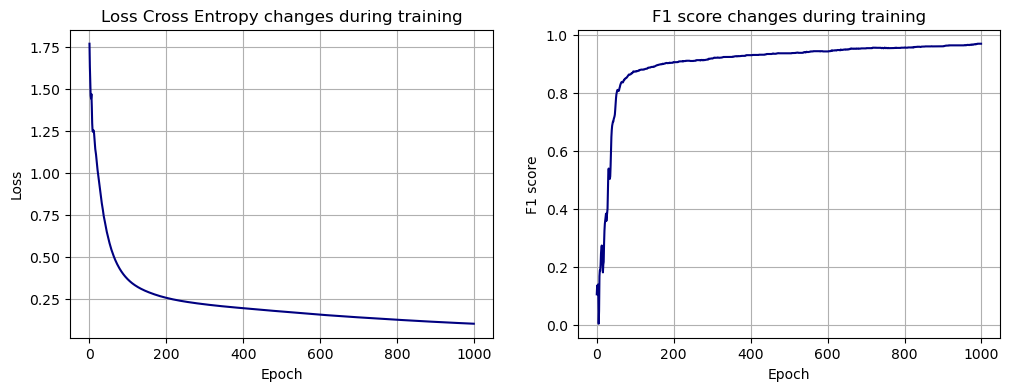

F-Measure on TEST dataset: 0.9332

Results.


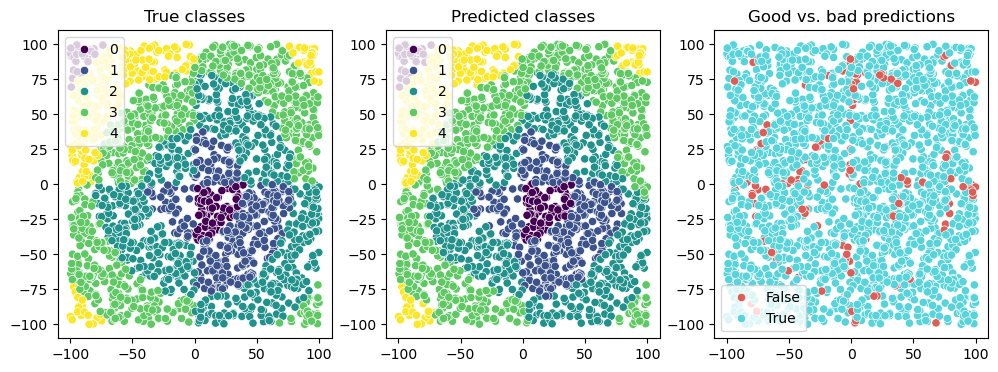

In [21]:
rings5_a2 = run_classification(train = rings5_regular_train,
                   test = rings5_regular_test,
                   layers_init=[
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 20, "activation": ReLU(), "init": "he_normal"},
                       {"output_size": 5, "activation": Softmax(), "init": "xavier_normal"}],
                   loss_function=LossCrossEntropy(),
                   epochs = 1000,
                   learning_rate = 0.05,
                   method = "momentum",
                   scaling = True,
                   random_state=42,
                   )

Summary

In [23]:
classification_summary = [
    ["RINGS3", "10-10-10", rings3_a1['number_of_epochs'], rings3_a1['training_time'], rings3_a1['final_f1_train'], rings3_a1['f1_test'], type(rings3_a1['loss_func']).__name__, rings3_a1['final_loss_train']],
    ["RINGS3", "20-20", rings3_a2['number_of_epochs'], rings3_a2['training_time'], rings3_a2['final_f1_train'], rings3_a2['f1_test'], type(rings3_a2['loss_func']).__name__, rings3_a2['final_loss_train']],
    ["RINGS5", "10-10-10", rings5_a1['number_of_epochs'], rings5_a1['training_time'], rings5_a1['final_f1_train'], rings5_a1['f1_test'], type(rings5_a1['loss_func']).__name__, rings5_a1['final_loss_train']],
    ["RINGS5", "20-20", rings5_a2['number_of_epochs'], rings5_a2['training_time'], rings5_a2['final_f1_train'], rings5_a2['f1_test'], type(rings5_a2['loss_func']).__name__, rings5_a2['final_loss_train']],
]

headers = ["Dataset", "Softmax", "Epochs", "Training Time (s)", "Final F1 (Train)", "F1 (Test)", "Loss Function", "Final Loss"]

print(tabulate(classification_summary, headers=headers, floatfmt=".4f", tablefmt="grid"))


+-----------+-----------+----------+---------------------+--------------------+-------------+------------------+--------------+
| Dataset   | Softmax   |   Epochs |   Training Time (s) |   Final F1 (Train) |   F1 (Test) | Loss Function    |   Final Loss |
+===========+===========+==========+=====================+====================+=============+==================+==============+
| RINGS3    | 10-10-10  |     1000 |              0.8310 |             0.9980 |      0.9691 | LossCrossEntropy |       0.0199 |
+-----------+-----------+----------+---------------------+--------------------+-------------+------------------+--------------+
| RINGS3    | 20-20     |     1000 |              1.1350 |             0.9887 |      0.9637 | LossCrossEntropy |       0.0486 |
+-----------+-----------+----------+---------------------+--------------------+-------------+------------------+--------------+
| RINGS5    | 10-10-10  |     1000 |              0.8109 |             0.9728 |      0.9310 | LossCrossE